In [0]:
import pm4py

# Repository as case
event_log_repo_as_case = pm4py.read_xes("data/merged_multi_repo_git_event_01_repo_as_case.xes")
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log_repo_as_case)
pm4py.view_dfg(dfg, start_activities, end_activities)

In [0]:
# Actor as case
event_log_actor_as_case = pm4py.read_xes("data/merged_multi_repo_git_event_01_actor_as_case.xes")
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log_actor_as_case)
pm4py.view_dfg(dfg, start_activities, end_activities)

array([[<Axes: title={'center': 'action_time'}>]], dtype=object)

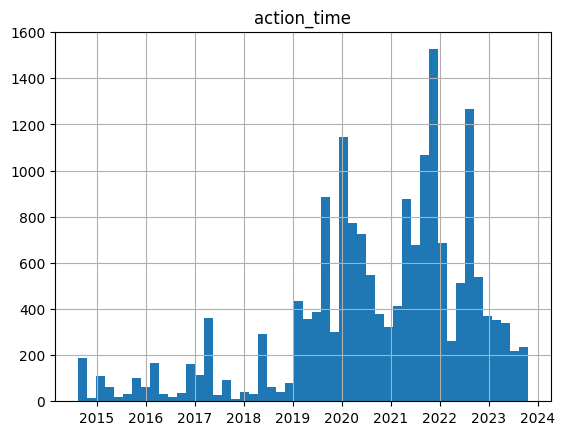

In [38]:
import pandas

event_log_csv = pandas.read_csv("data/merged_multi_repo_git_event_01.csv", low_memory=False)
event_log_csv["action_time"] = pandas.to_datetime(event_log_csv["action_time"])
event_log_csv.hist(column=["action_time"], bins=50)

array([[<Axes: title={'center': 'stats_total_file_change'}>]],
      dtype=object)

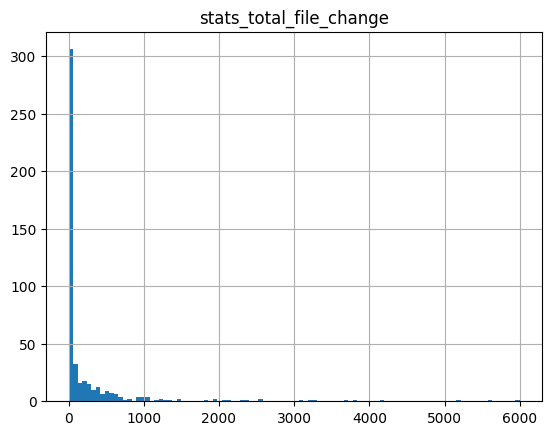

In [39]:
event_log_csv = event_log_csv.dropna(subset=["stats_total_file_change"])

event_log_csv.set_index("action_time", inplace=True)

# Resample data to weekly bins and compute the sum
weekly_bins = event_log_csv.resample('W').sum()

weekly_bins.hist(column=["stats_total_file_change"], bins=100)